FileNotFoundError: [Errno 2] No such file or directory: '../Outputs/Plots/HD 219134 c.png'

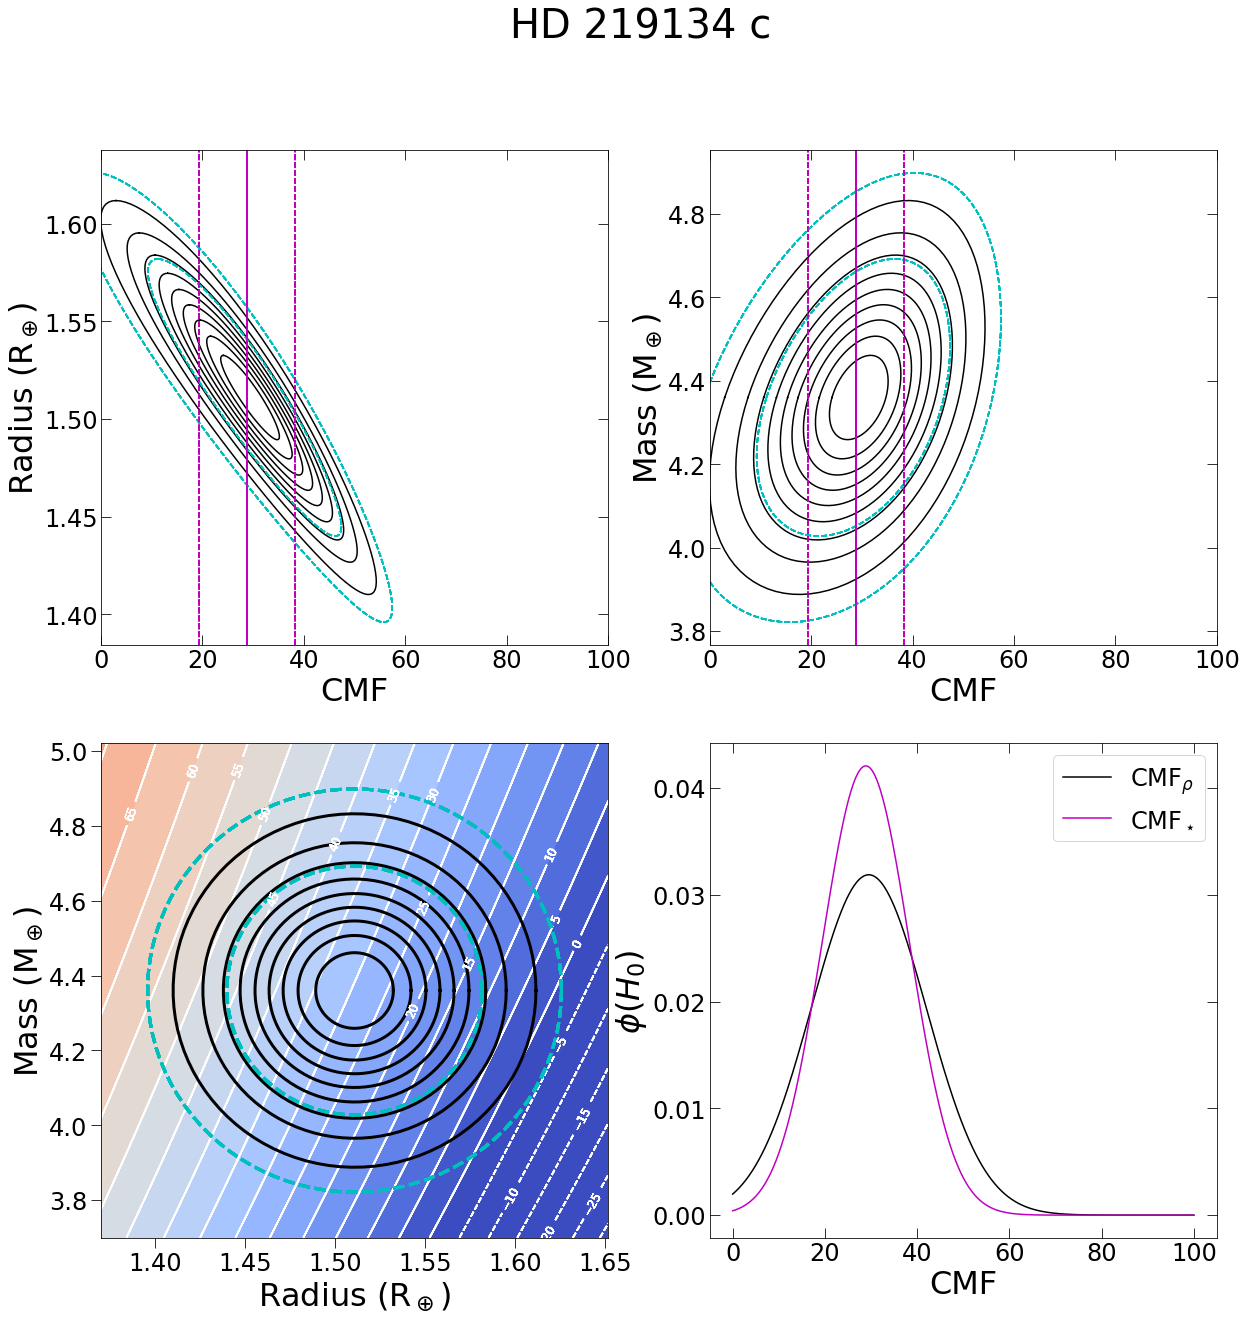

In [2]:
#Schulze Graph
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import matplotlib as mpl


#initialize some arrays.
cmfout = []
sigcmfp = []
sigcmfm = []
integ = []


angle = np.linspace(0.0,2*np.pi,100)
outputpath = '../Outputs/Plots' 

def plot_cmf(mass, radius, planet_fname, cmfstar = []):
    
    #This function generates the planetary output plots.
 
    fig, axs = plt.subplots(2, 2, figsize = (20,20))
    axs = axs.flatten()
    
    cmfstar_flag = 0
        
    Mass = mass[0]; sigM = mass[1]
    Radius = radius[0]; sigR = radius[1]
    

    
    if len(cmfstar)>0:
        CMFstar = cmfstar[0]; sigCMFstar = cmfstar[1]
        cmfstar_flag = 1
    
    #This chunk of code generates CMF vs Radius plots for a given planet. The
    #plot consists of 10-90% confidence ellipses plotted as solid black lines,
    #and the 1-sigma (68%) and 2-sigma (95%) confidence ellipses plotted as dashed
    #cyan lines.
    for k in np.linspace(0,0.9,10):
        
        csquared = sp.chi2.ppf(k,2)
        rrrrx =(csquared**0.5)*sigR*np.cos(angle)+Radius
        rmrmx = (csquared**0.5)*sigM*np.sin(angle)+Mass
        cmf = cmf_rho(rmrmx, rrrrx)
        axs[0].plot(cmf,rrrrx, 'k-')
        
        csquared68 = sp.chi2.ppf(0.68,2)
        rrrr68 =(csquared68**0.5)*sigR*np.cos(angle)+Radius
        rmrm68 = (csquared68**0.5)*sigM*np.sin(angle)+Mass
        cmf68 = cmf_rho(rmrm68, rrrr68)
        axs[0].plot(cmf68,rrrr68, 'c--')
        
        csquared95 = sp.chi2.ppf(0.95,2)
        rrrr95 =(csquared95**0.5)*sigR*np.cos(angle)+Radius
        rmrm95 = (csquared95**0.5)*sigM*np.sin(angle)+Mass
        cmf95 = cmf_rho(rmrm95, rrrr95)
        axs[0].plot(cmf95,rrrr95, 'c--')
        
        
        if cmfstar_flag == 1:
            axs[0].axvline(CMFstar, color = 'm')
            axs[0].axvline(CMFstar+sigCMFstar, linestyle = '--', color = 'm')
            axs[0].axvline(CMFstar-sigCMFstar, linestyle = '--', color = 'm')

        axs[0].set_ylabel(r'Radius (R$_\oplus)$', fontsize = 32)
        axs[0].set_xlabel('CMF', fontsize = 32)
        axs[0].tick_params('both', direction = 'in', top = True, right = True, labelsize = 24, length = 10)
        axs[0].set_xlim([0.0,100])

        
    #------------------------------------------------------------------------------------------------#        
    #This chunk of code does the same thing as above only with CMF vs Mass    

        axs[1].plot(cmf,rmrmx, 'k-')
        axs[1].plot(cmf68,rmrm68, 'c--')
        axs[1].plot(cmf95,rmrm95, 'c--')

        if cmfstar_flag == 1:
            axs[1].axvline(CMFstar, color = 'm')
            axs[1].axvline(CMFstar+sigCMFstar, linestyle = '--', color = 'm')
            axs[1].axvline(CMFstar-sigCMFstar, linestyle = '--', color = 'm')
        axs[1].set_ylabel(r'Mass (M$_\oplus)$', fontsize = 32)
        axs[1].set_xlabel('CMF', fontsize = 32)
        axs[1].tick_params('both', direction = 'in', top = True, right = True, labelsize = 24, length = 10)
        axs[1].set_xlim([0.0,100.0])
   
       
    #------------------------------------------------------------------------------------------------#        
    #This chunk of code generates a contour map of CMF as a function of both mass and radius.
    #The M-R confidence intervals described above are overlain on this plot as well.

        massmat = np.linspace(Mass-3*sigM, Mass+3*sigM, 100)
        radmat = np.linspace(Radius-3*sigR, Radius+3*sigR, 100)
        RX, MY = np.meshgrid(radmat, massmat)
        CMFZ = cmf_rho(MY,RX)
        cmap = plt.get_cmap('coolwarm')
        norm = mpl.colors.Normalize(vmin=0.0,vmax=100.0)
    
    
        axs[2].contourf(RX,MY,CMFZ,  20, norm = norm, cmap = cmap)
        CS = axs[2].contour(RX,MY,CMFZ, 20, colors = 'w')

        axs[2].plot(rrrrx,rmrmx, 'k-', linewidth = 3)
        axs[2].clabel(CS, fontsize=12, inline=1)
        axs[2].plot(rrrr68,rmrm68, 'c--', linewidth = 3)
        axs[2].plot(rrrr95,rmrm95, 'c--', linewidth = 3)
    
        axs[2].set_ylabel(r'Mass (M$_\oplus$)', fontsize = 32)
        axs[2].set_xlabel(r'Radius (R$_\oplus$)', fontsize = 32)
        axs[2].tick_params('both', labelsize = 24, length = 10)
    
    
       
    
    
    #------------------------------------------------------------------------------------------------#
     
    #This chunck of code approximates the upper and lower 1-sigm uncertainties in
    #CMF rho from the 68% confidence ellipse and plots the resultant 1D PDF for CMF rho.
    #If CMF star is input, the expected CMF PDF if plotted as well.
    angle10 = np.linspace(0.0,2*np.pi,1000)
    rrrr =(csquared68**0.5)*sigR*np.cos(angle10)+Radius
    rmrm = (csquared68**0.5)*sigM*np.sin(angle10)+Mass
    cmfdif = cmf_rho(rmrm, rrrr) - cmf_rho(Mass, Radius)*np.ones(len(rrrr))


    sigmp = 0
    sigmm = 0
    sigrp = 0
    sigrm = 0

    countp = 0
    countm = 0

    for j in range(0, len(rrrr)):
        if cmfdif[j]>0:
            sigmp = sigmp + rmrm[j]
            sigrp = sigrp + rrrr[j]
            countp = countp+1
        if cmfdif[j]<0:
            sigmm = sigmm + rmrm[j]
            sigrm = sigrm + rrrr[j]
            countm = countm+1
        

        
    sigmm = sigmm/countm
    sigrm = sigrm/countm

    sigrp = sigrp/countp
    sigmp = sigmp/countp
    
    xarr = np.linspace(0,100, 1000)
    
    cmf = cmf_rho(Mass, Radius)
    
    
    if cmfstar_flag == 1:
        if cmf-CMFstar>0:
            sigcmf = abs(cmf - cmf_rho(sigmm,sigrm))
        
        else: 
            sigcmf = abs(cmf-cmf_rho(sigmp,sigrp))
        
    #if no CMF star value is given just use a nominal value of 35 (median FGK value)
    #to determine whether to use the upper or lower uncertainty in CMF rho
    #for plotting purposes
    else:
        if cmf-35.0>0:
            sigcmf = abs(cmf - cmf_rho(sigmm,sigrm))
        
        else: 
            sigcmf = abs(cmf-cmf_rho(sigmp,sigrp))

    
    planet = sp.norm.pdf(xarr, loc = cmf, scale = sigcmf)
    
    
    axs[3].plot(xarr, planet, 'k-', label = r'CMF$_\rho$')
    
    if cmfstar_flag == 1:
        star = sp.norm.pdf(xarr, loc = CMFstar, scale = sigCMFstar)
        axs[3].plot(xarr, star, 'm-', label = r'CMF$_\star$')

    
    axs[3].set_ylabel(r'$\phi (H_0)$', fontsize = 32)
    axs[3].set_xlabel('CMF', fontsize = 32)
    axs[3].tick_params('both', direction = 'in', top = True, right = True, labelsize = 24, length = 10)
    
    axs[3].legend(fontsize = 24)
    

    plt.suptitle(planet_fname, fontsize = 40)
    
    plt.savefig(outputpath + '/' + planet_fname, facecolor = 'w' )
    plt.close('all')
    

def cmf_rho(M, R):
    cmfrho = (4./3.)*np.pi*(R**3)*rhoc(M) - M*rhoc(M)/rhom(M)
    cmfrho = cmfrho/(M*(1-rhoc(M)/rhom(M)))
    return 100*cmfrho

def rhoc(Mp):
    rhoc = rho(Mp, 0.36125593204992873, 0.153364551060784, 0.5351858792798839)
    return rhoc

def rho(M,a0,a1,a2):
    rho = a0+(a1*(M**a2))
    return rho

def rhom(Mp):

    rhom = rho(Mp, 0.12372222237561939, 0.06565578408094341, 0.4096898631741826)
    return rhom

plot_cmf(mass = [4.36, 0.22], radius = [1.511, 0.047], planet_fname = 'HD 219134 c', cmfstar = [28.869,9.478])

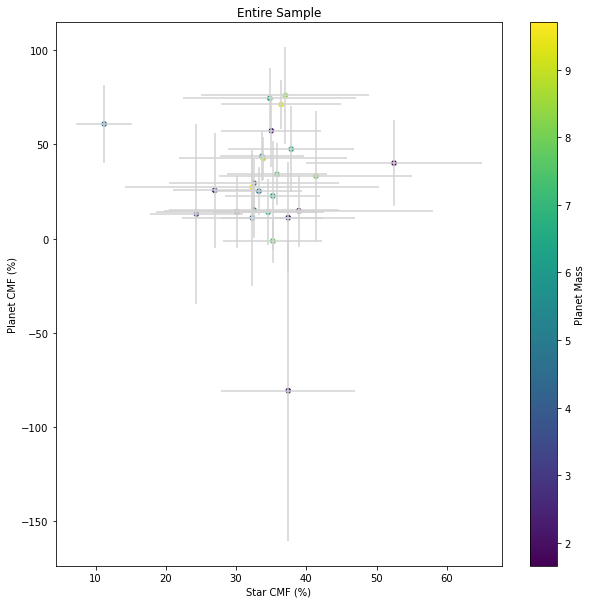

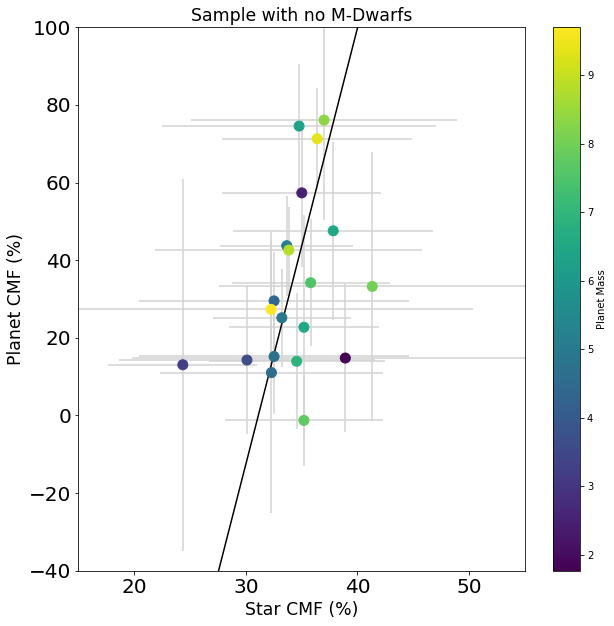

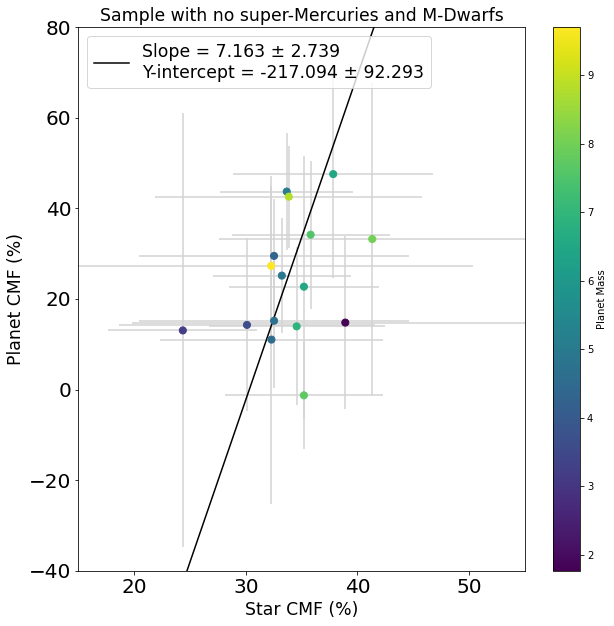

In [11]:
# Adibekyan Graphs
from pandas import DataFrame, read_csv
import pandas as pd 
import os
import numpy as np

directory_path = os.getcwd()
df = pd.read_excel(os.path.join(directory_path, "Adibekyan Graphs.xlsx")) 
y_errormin = df['Lower Planet Error'].tolist()
y_errormax = df['Upper Planet Error'].tolist()
asymmetric_error = np.array(list(zip(y_errormin, y_errormax))).T
ax1 = df.plot(kind='scatter', x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', xerr='Star Error', yerr=asymmetric_error, c='lightgrey', title = 'Entire Sample', figsize=(10,10)) 
ax2 = df.plot.scatter(x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', c='Planet Mass', cmap='viridis', ax=ax1)

df2 = pd.read_excel(os.path.join(directory_path, "Adibekyan No M.xlsx")) 
y_errormin = df2['Lower Planet Error'].tolist()
y_errormax = df2['Upper Planet Error'].tolist()
asymmetric_error = np.array(list(zip(y_errormin, y_errormax))).T
avg_planet_error_2 = [11.5205, 11.8425, 26.946, 22.93, 17.274, 12.3475, 21.0005, 16.3355, 14.3045, 12.1125, 16.205, 17.1465, 32.9165, 11.2525, 13.5305, 17.0965, 42.1, 15.454, 10.807, 31.4055]
ax3 = df2.plot(kind='scatter', x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', xerr='Star Error', yerr=asymmetric_error, c='lightgrey', title = 'Sample with no M-Dwarfs', figsize=(10,10), ylim=[-40,100], xlim = [15,55], fontsize='xx-large') 
ax4 = df2.plot.scatter(x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', s=100, c='Planet Mass', cmap='viridis', ax=ax3, zorder=10, fontsize='xx-large')
ax3.set_title('Sample with no M-Dwarfs', fontsize='xx-large')
ax3.set_xlabel('Star CMF (%)', fontsize='xx-large')
ax3.set_ylabel('Planet CMF (%)', fontsize='xx-large')
ax3.tick_params(axis='x', which='major', labelsize=20)
ax3.tick_params(axis='y', which='major', labelsize=20)
x = np.asarray([0,65])
line = plt.plot(x, 11.23145648*x - 349.48564973, color='black')
#plt.legend(['Slope = 11.232 \u00B1 3.973 \nY-intercept = -349.486 \u00B1 134.934'], loc='upper right', fontsize='xx-large')

df3 = pd.read_excel(os.path.join(directory_path, "Adibekyan No SM.xlsx")) 
y_errormin = df3['Lower Planet Error'].tolist()
y_errormax = df3['Upper Planet Error'].tolist()
asymmetric_error = np.array(list(zip(y_errormin, y_errormax))).T
avg_planet_error_3 = [11.5205, 11.8425, 26.946, 12.3475, 21.0005, 16.3355, 14.3045, 12.1125, 16.205, 17.1465, 32.9165, 17.0965, 42.1, 15.454, 10.807, 31.4055]
ax5 = df3.plot(kind='scatter', x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', xerr='Star Error', yerr=asymmetric_error, c='lightgrey', title = 'Sample with no super-Mercuries and M-Dwarfs', figsize=(10,10), ylim=[-40,80], xlim = [15,55]) 
ax6 = df3.plot.scatter(x='Star CMF', y='Planet CMF', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', s=50, c='Planet Mass', cmap='viridis', ax=ax5, zorder=10)

ax5.set_title('Sample with no super-Mercuries and M-Dwarfs', fontsize='xx-large')
ax5.set_xlabel('Star CMF (%)', fontsize='xx-large')
ax5.set_ylabel('Planet CMF (%)', fontsize='xx-large')
ax5.tick_params(axis='x', which='major', labelsize=20)
ax5.tick_params(axis='y', which='major', labelsize=20)
x = np.asarray([0,65])
line = plt.plot(x, 7.1627886*x - 217.09365749, color='black')
plt.legend(['Slope = 7.163 \u00B1 2.739 \nY-intercept = -217.094 \u00B1 92.293'], loc='upper left', fontsize='xx-large')


In [ ]:
import scipy
import numpy as np

x = []
sx = []
y = []
sy = avg_planet_error_2
for element in df2["Star CMF"]:
    x.append(element)
for element in df2["Star Error"]:
    sx.append(element)
for element in df2["Planet CMF"]:
    y.append(element)
    
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = scipy.odr.Model(f)
mydata = scipy.odr.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
myodr = scipy.odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

In [ ]:
import scipy.stats as stats

star_cmf_2 = []
planet_cmf_2 = []
for element in df2["Star CMF"]:
    star_cmf_2.append(element)
for element in df2["Planet CMF"]:
    planet_cmf_2.append(element)
stats.ttest_rel(star_cmf_2, planet_cmf_2)

# Run Adibekyan t-test

In [ ]:
import scipy
import numpy as np

x = []
sx = []
y = []
sy = avg_planet_error_3
for element in df3["Star CMF"]:
    x.append(element)
for element in df3["Star Error"]:
    sx.append(element)
for element in df3["Planet CMF"]:
    y.append(element)
    
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = scipy.odr.Model(f)
mydata = scipy.odr.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
myodr = scipy.odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

In [ ]:
star_cmf_3 = []
planet_cmf_3 = []
for element in df3["Star CMF"]:
    star_cmf_3.append(element)
for element in df3["Planet CMF"]:
    planet_cmf_3.append(element)
stats.ttest_rel(star_cmf_3, planet_cmf_3)

# Run Adibekyan t-test

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
df4 = pd.read_excel(os.path.join(directory_path, "Star CMF Density.xlsx")) 
print(df4)
ax7 = df4.plot(kind='scatter', x='Stellar CMF', y='Density', xlabel = 'Star CMF (%)', ylabel= 'Normalized Density', xerr='CMF Error', yerr='Density Error', c='lightgrey', title = 'Density and Stellar CMF, no M-dwarfs', figsize=(10,10), xlim=[24,40], ylim=[0.4,1.6], zorder = 1)
ax8 = df4.plot(kind='scatter', x='Stellar CMF', y='Density', xlabel = 'Star CMF (%)', ylabel= 'Normalized Density', s=50, c='blue', ax=ax7, zorder = 10)
ax7.set_title('Density and Stellar CMF, no M-dwarfs', fontsize='xx-large')
ax7.set_xlabel('Star CMF (%)', fontsize='xx-large')
ax7.set_ylabel('Normalized Density', fontsize='xx-large')
ax7.tick_params(axis='x', which='major', labelsize=20)
ax7.tick_params(axis='y', which='major', labelsize=20)
x = np.asarray([24,40])
line = plt.plot(x, 0.10727134*x - 2.6308248, color='black')
plt.legend(['Slope = 0.107 \u00B1 0.040 \nY-intercept = -2.631 \u00B1 1.349'], loc='upper left', fontsize='xx-large')
#upper_line = plt.plot(x, 0.14710219*x - 1.28204439, color='red')
#lower_lin = plt.plot(x, 0.106744049*x - 3.97960521, color='red')

In [ ]:
import scipy
import numpy as np

x = []
sx = []
y = []
sy = []
for element in df4["Stellar CMF"]:
    x.append(element)
for element in df4["CMF Error"]:
    sx.append(element)
for element in df4["Density"]:
    y.append(element)
for element in df4["Density Error"]:
    sy.append(element)
    
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = scipy.odr.Model(f)
mydata = scipy.odr.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
myodr = scipy.odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

    Planet Name  Stellar CMF  CMF Error  Density  Density Error
0      55 Cnc e       35.203      7.054   0.7494         0.0858
1       GJ 9827       33.224      6.174   0.9159         0.1419
2        K2-265       35.203      6.718   0.9105         0.2927
3        K2-141       33.662      5.947   1.0795         0.1944
4        K2-291       37.830      8.952   1.1260         0.3788
5       WASP-47       34.553      7.887   0.8630         0.1732
6   HD 219134 b       32.529     12.094   0.8847         0.1266
7   HD 219134 c       32.529     12.094   0.9699         0.1395
8     Kepler-20       32.266     18.102   0.9322         0.2118
9     Kepler-78       38.911     19.120   0.8709         0.1599
10    Kepler-93       32.293     10.000   0.8514         0.3185
11    Kepler-10       30.101     11.486   0.8687         0.1650
12      TOI-561       24.353      6.672   0.8432         0.4027
13      TOI-402       35.804      7.086   0.9703         0.2128
14    HD 213885       33.847     11.969 

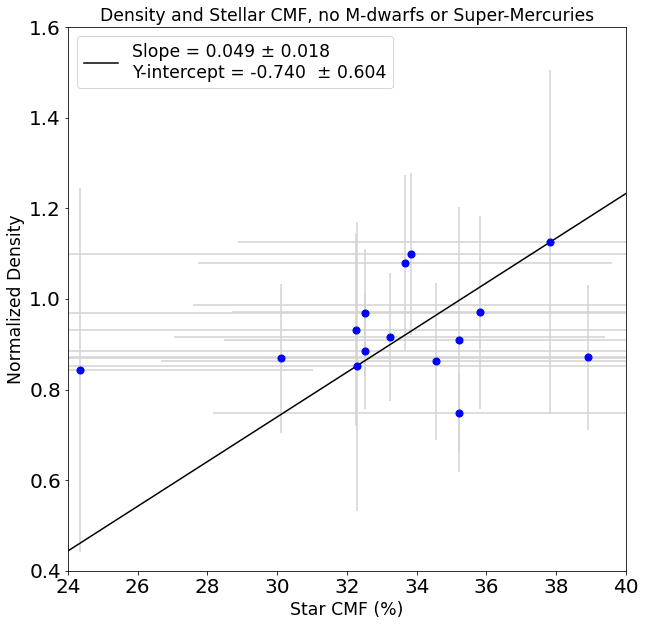

In [3]:
import matplotlib.pyplot as plt
import numpy as np
df5 = pd.read_excel(os.path.join(directory_path, "Star CMF Density No SM.xlsx")) 
print(df5)
ax9 = df5.plot(kind='scatter', x='Stellar CMF', y='Density', xerr='CMF Error', yerr='Density Error', c='lightgrey', figsize=(10,10), xlim=[24,40], ylim=[0.4,1.6])
ax10 = df5.plot(kind='scatter', x='Stellar CMF', y='Density', s=50, c='blue', ax=ax9, zorder = 10)
ax9.set_title('Density and Stellar CMF, no M-dwarfs or Super-Mercuries', fontsize='xx-large')
ax9.set_xlabel('Star CMF (%)', fontsize='xx-large')
ax9.set_ylabel('Normalized Density', fontsize='xx-large')
ax9.tick_params(axis='x', which='major', labelsize=20)
ax9.tick_params(axis='y', which='major', labelsize=20)
x = np.asarray([24,40])
line = plt.plot(x, 0.04931479*x -0.73969311, color='black')
plt.legend(['Slope = 0.049 \u00B1 0.018 \nY-intercept = -0.740  \u00B1 0.604'], loc='upper left', fontsize='xx-large')

In [4]:
import scipy
import numpy as np

x = []
sx = []
y = []
sy = []
for element in df5["Stellar CMF"]:
    x.append(element)
for element in df5["CMF Error"]:
    sx.append(element)
for element in df5["Density"]:
    y.append(element)
for element in df5["Density Error"]:
    sy.append(element)
    
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = scipy.odr.Model(f)
mydata = scipy.odr.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
myodr = scipy.odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

AttributeError: module 'scipy' has no attribute 'odr'

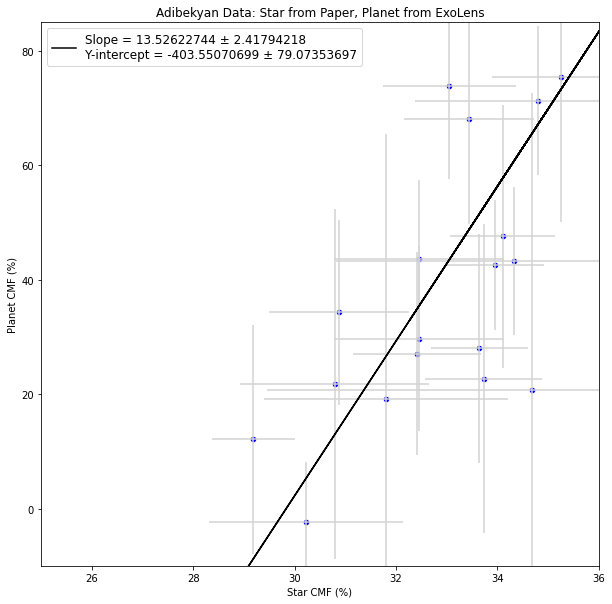

In [5]:
# Adibekyan Graphs
from pandas import DataFrame, read_csv
import pandas as pd 
import os
import numpy as np

directory_path = os.getcwd()
df6 = pd.read_excel(os.path.join(directory_path, "Adibekyan Data Planet ExoLens.xlsx")) 
y_errormin = df6['Lower Planet Error'].tolist()
y_errormax = df6['Upper Planet Error'].tolist()
asymmetric_error = np.array(list(zip(y_errormin, y_errormax))).T
avg_planet_error_4 = df6['Avg Error'].tolist()
ax11 = df6.plot.scatter(x='Adibekyan Stellar CMF', y='Planet CMF (ExoLens using Adibekyan Data)', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', xerr='Star Error', yerr=asymmetric_error, c='lightgrey', title = 'Adibekyan Data: Star from Paper, Planet from ExoLens', figsize=(10,10), xlim=[25,36], ylim=[-10,85]) 
ax12 = df6.plot.scatter(x='Adibekyan Stellar CMF', y='Planet CMF (ExoLens using Adibekyan Data)', xlabel = 'Star CMF (%)', ylabel= 'Planet CMF (%)', c='blue', ax=ax11)
x = np.array(x)
line = plt.plot(x, 13.52622744*x - 403.55070699, color='black')
plt.legend(['Slope = 13.52622744 \u00B1 2.41794218 \nY-intercept = -403.55070699 \u00B1 79.07353697'], loc='upper left', fontsize='large')

In [6]:
import scipy
import numpy as np

x = []
sx = []
y = []
sy = avg_planet_error_4
for element in df6["Adibekyan Stellar CMF"]:
    x.append(element)
for element in df6["Star Error"]:
    sx.append(element)
for element in df6["Planet CMF (ExoLens using Adibekyan Data)"]:
    y.append(element)
    
def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = scipy.odr.Model(f)
mydata = scipy.odr.Data(x, y, wd=1./np.power(sx,2), we=1./np.power(sy,2))
myodr = scipy.odr.ODR(mydata, linear, beta0=[1., 2.])
myoutput = myodr.run()
myoutput.pprint()

AttributeError: module 'scipy' has no attribute 'odr'